In [53]:
import tellurium as te

r = te.loadSBMLModel('MODEL1112110003_modified.xml')
print(r.getCurrentAntimony())

// Created by libAntimony v2.13.2
model *Gaetano2008_DiabetesProgressionModel()

  // Compartments and Species:
  compartment body;
  species $B in body, $lamda in body, $I in body, $h in body, $G in body;
  species $gamma_ in body;

  // Assignment Rules:
  lamda := lamdamin + eta*(x^3/(x^3 + 1));
  h := (G/Gh)^vh/(1 + (G/Gh)^vh);
  ImaxB := TigB/Kxi;
  G := gamma_/(rho + I);
  gamma_ := Tgl/Kxgi;
  rho := Kxg/Kxgi;
  x := X0*(G/Glamda);
  Tgl := (Kxgi*I0 + Kxg)*G0;
  TigB := Kxistart*I0/(B0*h0);
  ImaxB0 := 0.0287/0.05;
  Kag := Kxa*A0/(G0*((100 - A0)/100));
  lamdamax := lamdamin + eta;

  // Rate Rules:
  B' = lamda*B;
  I' = h*ImaxB*B;
  eta' = -KetaG*eta*G + Teta;
  Kxi' = Kxistart + ((time - t0)/(tmax - t0))*(Kxiend - Kxistart);
  A' = -Kxa*A + Kag*G*(100 - A)/100;

  // Species initializations:
  B = 1000;
  I = 50;

  // Compartment initializations:
  body = 1;

  // Variable initializations:
  Gh = 9;
  vh = 4;
  lamdamin = -0.02;
  eta = 0.04;
  Kxgi = 0.0001;
  B0 = 1000;
 

In [54]:
r.setIntegrator('gillespie')
r.getAvailableIntegrators()
r.setIntegrator('cvode')

In [55]:
r.reset()
result = r.simulate(0, 80)

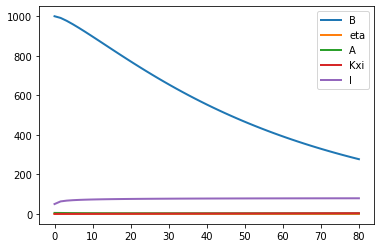

In [56]:
r.plot(result)

In [57]:
result

    time,       B,       eta,       A,      Kxi,       I
 [[    0,    1000,      0.04,       5,     0.05,      50],
  [  1.6,  991.46, 0.0360791,  4.7645, 0.129787, 63.3189],
  [  3.2, 976.734, 0.0331369, 4.46704, 0.209147, 67.2562],
  [  4.8, 959.618, 0.0306892, 4.21637,  0.28808,  69.446],
  [  6.4, 941.156, 0.0285946, 4.01845, 0.366587, 70.9137],
  [    8, 921.865, 0.0267779, 3.86541, 0.444667,  71.994],
  [  9.6, 902.063, 0.0251897, 3.74776,  0.52232, 72.8352],
  [ 11.2, 881.967,  0.023794, 3.65719, 0.599547, 73.5155],
  [ 12.8, 861.733,  0.022563, 3.58704, 0.676347, 74.0806],
  [ 14.4, 841.481, 0.0214742, 3.53222,  0.75272, 74.5597],
  [   16, 821.303, 0.0205092, 3.48891, 0.828667, 74.9729],
  [ 17.6,  801.27, 0.0196526, 3.45424, 0.904187, 75.3334],
  [ 19.2, 781.438, 0.0188912, 3.42612,  0.97928, 75.6511],
  [ 20.8, 761.854, 0.0182137, 3.40298,  1.05395, 75.9337],
  [ 22.4, 742.552, 0.0176103, 3.38368,  1.12819, 76.1868],
  [   24,  723.56, 0.0170727, 3.36737,    1.202, 76.4149],